In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import time

In [2]:
mnist = pd.read_csv('train.csv')

In [3]:
mnist.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist.shape

(42000, 785)

# Visualizing how the first image looks.

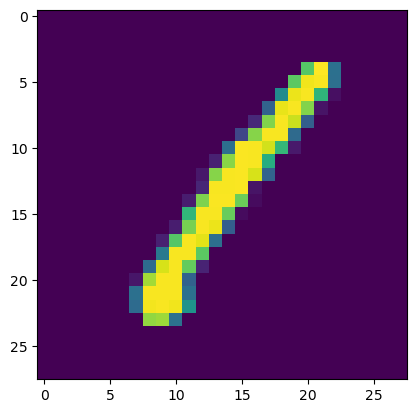

In [5]:
plt.imshow(mnist.iloc[0, 1:].values.reshape(28, 28))

In [6]:
X = mnist.drop(columns = ['label'])

In [7]:
Y = mnist['label']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

# Using K nearest neighbors to classify data.

In [9]:
knn = KNeighborsClassifier()

In [10]:
knn.fit(X_train, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [11]:
start = time.time()
test_preds = knn.predict(X_test)
print(time.time() - start)

7.712002992630005


In [12]:
accuracy_score(Y_test, test_preds)

0.9663095238095238

## Using data with 784 dimensions to classify, takes about 7.74 seconds to predict with an accuracy of 0.9663.

# Applying PCA and reducing the dimension to 100.

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
pca = PCA(n_components = 100)

In [16]:
X_train_pca = pca.fit_transform(X_train)

In [17]:
X_test_pca = pca.transform(X_test)

In [18]:
X_train_pca.shape

(33600, 100)

In [19]:
knn = KNeighborsClassifier()

In [20]:
knn.fit(X_train_pca, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
start = time.time()
test_preds = knn.predict(X_test_pca)
print(time.time() - start)

1.7414910793304443


In [22]:
accuracy_score(Y_test, test_preds)

0.9534523809523809

## Using data with 100 dimensions to classify, takes about 1.46 seconds to predict with an accuracy of 0.9534.

# Thus the prediction is made 6.28 seconds faster by reducing the dimension to 100 from 784.

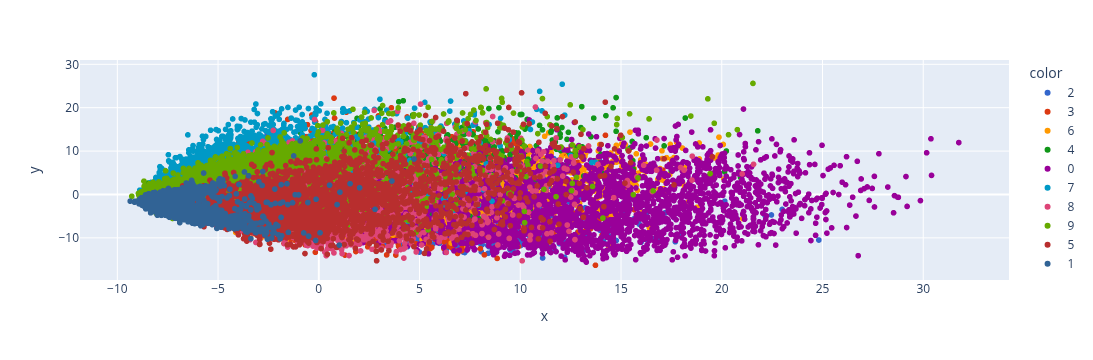

In [23]:
# Visualizing the data.

import plotly.express as px
Y_train_pca = Y_train.astype(str)
fig = px.scatter(x = X_train_pca[:, 0], y = X_train_pca[:, 1], color = Y_train_pca, color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

## Visualizing the data in 3D.

In [24]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

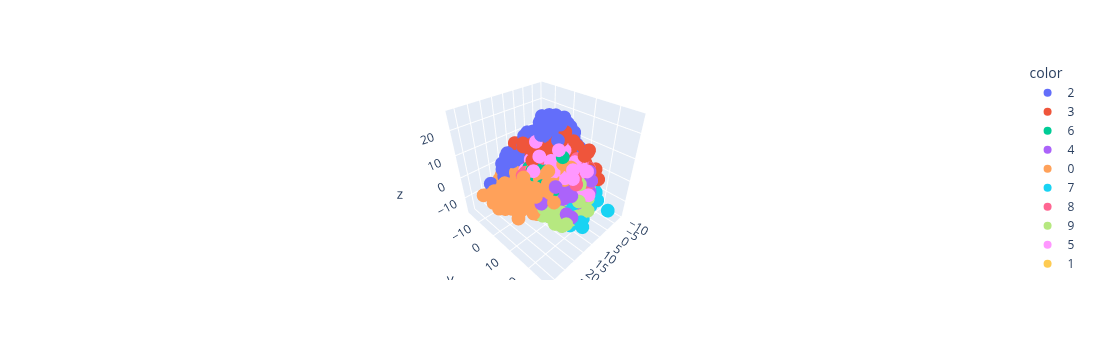

In [25]:
Y_train_pca = Y_train.astype(str)
fig = px.scatter_3d(x = X_train_pca[:, 0], y = X_train_pca[:, 1], z = X_train_pca[: ,2], color = Y_train_pca)

fig.show()

In [26]:
# eigen values

pca.explained_variance_

array([40.57650212, 29.12252071, 26.8239876 ])

In [27]:
# eigen vectors

pca.components_

array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]], shape=(3, 784))

In [29]:
# Contribution of each vector towards data

pca.explained_variance_ratio_

array([0.05747209, 0.0412488 , 0.03799319])